In [1]:
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from scipy.stats import binned_statistic

In [2]:
def osf(data):
    result = np.sum(data["visitExposureTime"]) / np.sum(
            data["slewTime"] + data["visitTime"]
        )
    return result

In [13]:
con = sqlite3.connect("baseline_v4.2_1yrs.db")
df = pd.read_sql("select night,slewtime,visitTime,visitExposureTime,scheduler_note from observations;", con)
con.close()

In [4]:
df

,night,slewTime,visitTime,visitExposureTime
0,0,102.701384,16.0,15.0
1,0,4.766004,16.0,15.0
2,0,4.772121,16.0,15.0
3,0,4.647978,16.0,15.0
4,0,4.801038,16.0,15.0
...,...,...,...,...
1997417,3652,5.133077,33.6,29.2
1997418,3652,5.186505,33.6,29.2
1997419,3652,5.136629,33.6,29.2
1997420,3652,5.116208,33.6,29.2


In [5]:
bins = np.arange(0,df["night"].max()+2) - 0.5
bs, be, bn = binned_statistic(df["night"], df["slewTime"], statistic=np.sum, bins=bins)

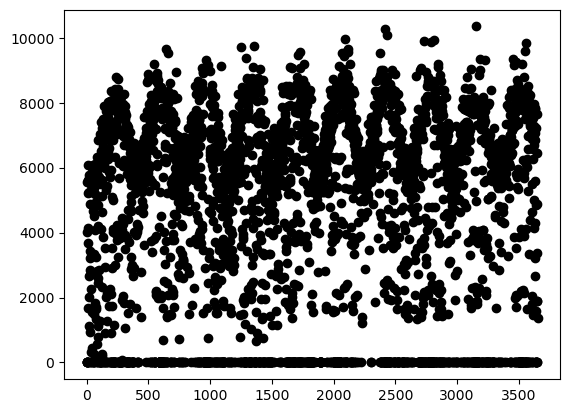

In [6]:
plt.plot(bins[1:], bs, 'ko')

In [15]:
bins = np.arange(0,df["night"].max()+2) - 0.5
u_nights = np.unique(df["night"])
bs = np.empty(u_nights.size)
for i,night in enumerate(u_nights):
    indx = np.where(df["night"] == night)
    bs[i] = osf(df.iloc[indx])

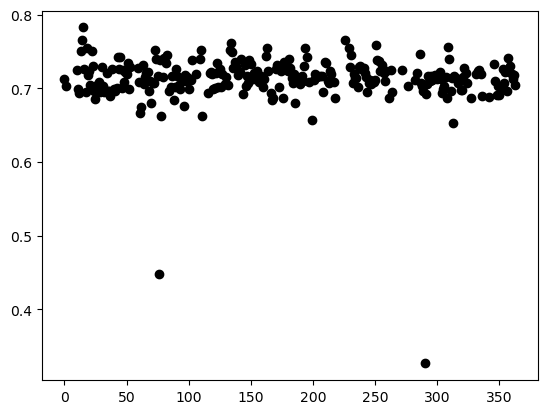

In [16]:
plt.plot(u_nights, bs, 'ko')

In [17]:
u_nights[np.where(bs < 0.6)]

array([ 76, 290])

In [19]:
indx = np.where(df["night"] == 290)
df.iloc[indx]

,night,slewTime,visitTime,visitExposureTime,scheduler_note
143062,290,55.887836,33.6,29.2,greedy


In [20]:
# why on earth are there nights with only 1 greedy image?

In [21]:
indx = np.where(df["night"] == 76)
df.iloc[indx]

,night,slewTime,visitTime,visitExposureTime,scheduler_note
32198,76,58.235295,33.6,29.2,greedy
32199,76,4.831796,33.6,29.2,greedy
